**Author:** Andre Scholich <br>
**Last update:** 2016-04-11

# Basic example of waveform classification

In [99]:
import matplotlib.patches as mpatches
from pylab import plt, np
from scipy import ndimage as ndi
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.io import imread
from skimage.measure import label
from skimage.measure import regionprops
from skimage.morphology import closing, square
from skimage.segmentation import clear_border
from skimage.transform import downscale_local_mean
%matplotlib inline

Generate some example wave forms. Keep it simple for a start.

In [106]:
t = np.linspace(0, 10, 100)
n_samples = 5
sines = []
for _idx in range(n_samples):
    period = np.random.rand() + 0.5
    shift = 3 * np.random.rand()
    w1 = np.sin(t / period - shift)
    sines.append(w1)
rectangles = []
for _idx in range(n_samples):
    period = np.random.rand() + 0.5
    shift = 3 * np.random.rand()
    w2 = np.array([2*float(np.sin(_t / period - shift) > 0) - 1 for _t in t])
    rectangles.append(w2)
data = sines + rectangles
target = [0] * n_samples + [1] * n_samples

Show five examples each.

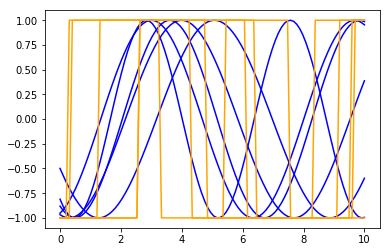

In [107]:
for k in range(5):
    plt.plot(t, sines[k], color='blue')
for k in range(5):
    plt.plot(t, rectangles[k], color='orange')

## Train SVM on annotated sample



In [108]:
data[0]

array([-0.88140042, -0.92484852, -0.958717  , -0.98265507, -0.99641476,
       -0.99985355, -0.99293583, -0.97573325, -0.94842399, -0.91129093,
       -0.86471868, -0.80918965, -0.74527901, -0.67364875, -0.59504081,
       -0.51026941, -0.42021263, -0.32580328, -0.22801924, -0.12787337,
       -0.02640299,  0.07534088,  0.17630436,  0.27544168,  0.37172596,
        0.4641599 ,  0.55178605,  0.63369678,  0.70904366,  0.77704625,
        0.83700016,  0.8882844 ,  0.93036776,  0.96281435,  0.98528807,
        0.99755614,  0.9994915 ,  0.99107409,  0.9723911 ,  0.94363605,
        0.9051068 ,  0.85720241,  0.8004191 ,  0.73534502,  0.66265421,
        0.58309961,  0.49750525,  0.4067577 ,  0.31179695,  0.2136066 ,
        0.1132037 ,  0.01162824, -0.09006767, -0.19083066, -0.28961702,
       -0.38540351, -0.47719798, -0.56404962, -0.64505882, -0.71938648,
       -0.7862627 , -0.8449948 , -0.89497441, -0.93568384, -0.96670144,
       -0.98770591, -0.99847968, -0.99891118, -0.98899592, -0.96

In [109]:
from sklearn import datasets
from sklearn import svm

digits = datasets.load_digits()

clf = svm.SVC(gamma=0.001, C=100.)
clf.fit(data, target)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Generate a new waveform. First one should give 0 --> sine wave, second one should give 1 --> rectangular wave

In [118]:
period = np.random.rand() + 0.5
shift = 3 * np.random.rand()
w1 = np.sin(t / period - shift)
clf.predict(w1.reshape(1, -1))

array([0])

In [119]:
period = np.random.rand() + 0.5
shift = 3 * np.random.rand()
w2 = np.array([2*float(np.sin(_t / period - shift) > 0) - 1 for _t in t])
clf.predict(w2.reshape(1, -1))

array([0])